# Which Days Were the Most Optimal For Outdoor Bouldering?

<img src="img/bouldering.jpg" width="450" style="display:block; margin:auto;">


Outdoor bouldering is a niche and intense form of outdoor climbing on natural rock formations. Bouldering is one type of rock climbing classified by its short but tricky climbs done without any safety harnesses. A more well known form of this activity may be lead climbing or free soloing where climbers scale massive cliff faces thousands of feet tall. A famous climber who recently appeared in the headlines is Alex Honnold who recently climbed the 11th tallest building in the world, Taipei 101, without any safety equipment live on Netflix. He is also the only person to climb the famous mountain El Capitan without safety equipment, a cliff face 3000 feet tall.

   **Question:** In the past 25 years, how many days had the most optimal conditions for climbing

We will define an optimal day for climbing if it satisfies the following conditions
- It's a sunny day
- It's on a weekend as that's the time most people climb
- The temperature is at a comfortable level between 64 and 75 degrees inclusive
- There has not been any rain in the last 2 days and no snow within the last week to ensure the rocks have sufficient grip
  

### Setup

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load the Dataset

In [4]:
weather_df = pd.read_csv('data/philadelphia_weather_2005_to_2025.csv')
weather_df = weather_df.assign(date=pd.to_datetime(weather_df['date']))

In [5]:
weather_df.head()

,day,year,high,low,rain,snow,date,day_num,month_num,dow,dow_name,month
0,January 1,2005,64,39,0.00,0.0,2005-01-01,1,1,5,Saturday,January
1,January 2,2005,47,33,0.01,0.0,2005-01-02,2,1,6,Sunday,January
2,January 3,2005,57,40,0.06,0.0,2005-01-03,3,1,0,Monday,January
3,January 4,2005,55,44,0.00,0.0,2005-01-04,4,1,1,Tuesday,January
4,January 5,2005,47,36,0.62,0.0,2005-01-05,5,1,2,Wednesday,January


### Sunny Days

The most important condition for outdoor bouldering is that it must be sunny. If it's raining or snowing, the climber will have poor visibility going up the climb and will also find it difficult to grip the rock. This will make the climb extremely dangerous.

In [6]:
sunny_df = weather_df.query("rain == 0 and snow == 0")
sunny_df.shape[0]

5130

As such, we can see there are 5130 days in the past 20 years where it was possible to go climbing. 

### Weekends

We also know that most climbers are casual, recreational climbers. As such, the most suitable days for them are Fridays, Saturdays and Sundays. As such, we will calculate the number of sunny weekends in the past 20 years which would've been the times most climbers were out.

In [7]:
weekend_sunny_df = sunny_df.query("dow >= 4 and dow <= 6")
weekend_sunny_df.shape[0]

2209

Here, we can see that there were 2209 such days which were sunny.

### Comfortable Temperature

Given the nature of outdoor bouldering, you are engaging in physical exercise outside. As such, it would be preferred if the temperature wasn't too hot or too cold. We will define the optimal temperature to be between 64 and 75 degrees inclusive which is a tight range in which you would be able to stay outside all day comfortably.

In [8]:
good_temp_df = weather_df.query("high <= 75 and low >= 64")
good_temp_df.shape[0]

48

We can see that the number of days that actually fall within this range is actually quite limited. That's because it's very rare for the temperature to stay within that bound completely over the course of the entire day, often exceeding it at noon or dropping below it at night.

### Good Weather Conditions

In outdoor bouldering, it would also be preferred if there was no rain within the last 2 days and no snow within the past week. By climbing on natural rock formations, the rock must be dry when climbing or else it would be very difficult to get a good hold on small holds. As such, time must be given for any rain or snow to dry and melt. 

#### No Rain

In [9]:
no_rain = weather_df["rain"].eq(0)
streak_id = (no_rain != no_rain.shift()).cumsum()
dry_streak_day = weather_df.groupby(streak_id).cumcount() + 1
no_rain_two_plus_df = weather_df[no_rain & (dry_streak_day >= 2)].copy()
no_rain_two_plus_df.shape[0]

3704

#### No Snow

In [10]:
no_snow = weather_df["snow"].eq(0)
snow_streak_id = (no_snow != no_snow.shift()).cumsum()
snowless_streak_day = weather_df.groupby(snow_streak_id).cumcount() + 1
no_snow_week_plus_df = weather_df[no_snow & (snowless_streak_day >= 7)].copy()
no_snow_week_plus_df.shape[0]

6655

#### No Snow and No Rain

In [11]:
good_weather_conditions_df = no_rain_two_plus_df.merge(no_snow_week_plus_df, how = "inner")
good_weather_conditions_df.shape[0]

3320

From the above code chunks, we can observe that there are 3320 days with no rain in the past two days and no snow within the past week. These are the number of days where the rock is dry enough to climb.

### Number of Optimal Days

Having found the days which satisfy all of our conditions above, we can now merge all the conditions to find the days with the most optimal climbing conditions in the past 20 years. 

In [16]:
good_temp_weekends_df = weekend_sunny_df.merge(good_temp_df, how = "inner")
optimal_days_df = good_temp_weekends_df.merge(good_weather_conditions_df, how = "inner")
optimal_days_df.shape[0]

1

Here we can see that only one day in the past 20 years actually fits all of our conditions.

In [17]:
optimal_days_df.head()

,day,year,high,low,rain,snow,date,day_num,month_num,dow,dow_name,month
0,June 11,2022,75,66,0.0,0.0,2022-06-11,11,6,5,Saturday,June


That day is June 11th 2022, a Saturday with a high temperature of 75 degrees and a low of 66 degrees.

### Spread of Non-Rainy Days on Weekends

Now, we know that it would be ridiculous to assume that people would only climb on days with the most optimal conditions. As such, we will simply consider the requirments that it must not be raining on the day and it must be on a weekend. A simple bar graph can illustrate the spead of days in which people can climb then.

In [18]:
counts = (
    weather_df[weather_df["rain"] == 0]
    .query("dow_name in ['Friday','Saturday','Sunday']")
    ["dow_name"]
    .value_counts()
    .reindex(["Friday","Saturday","Sunday"])
)

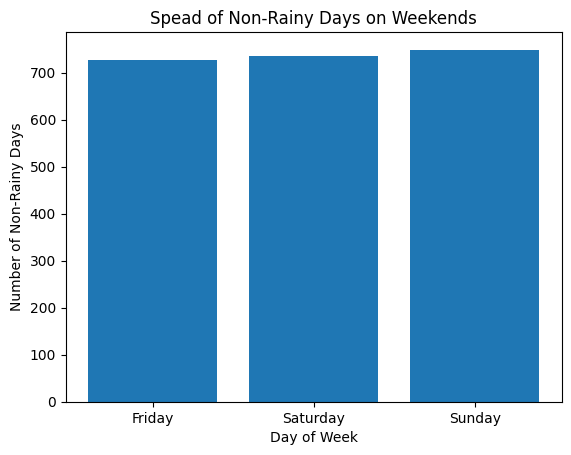

In [20]:
plt.figure()
plt.bar(counts.index, counts.values)
plt.xlabel("Day of Week")
plt.ylabel("Number of Non-Rainy Days")
plt.title("Spead of Non-Rainy Days on Weekends")
plt.show()

This graph shows us that the spread of non-rainy days on weekends is roughly the same, with a bit over 2100 days in total. As such, we can conclude that the total number of people who have climbed on a Friday, Saturday or Sunday are roughly equal. 